In [1]:
import glob
import os
import numpy as np
import json
import cv2
from matplotlib import pyplot as plt
import copy 
from skimage.feature import hog
from skimage import data, exposure
import argparse


## Useful information for the project
- The file size of the CityScapes data is (1024, 2048, 3)

In [2]:
# parameters=argparse.ArgumentParser(description="Parameters for training SVM on HoG features")
# parameters.add_argument('-f','file',type=str,help='path to train data',default='./data/rawdata/leftImg8bit/train',\
#                        required=True)

# parser = argparse.ArgumentParser(description='Demo for human detection from image')
# parser.add_argument('-i', '--input', type=str, help='input file', required=True)
# parser.add_argument('-o', '--output', type=str, default='output.png', help='output file', required=True)
# parser.add_argument('-m', '--model', type=str, default='models.dat', help='the trained model file', required=True)
# args = parser.parse_args()

# inputFile = getattr(args, 'input')
# outFile = getattr(args, 'output')
# modelFile = getattr(args, 'model')

In [3]:
# def image_viewer(raw_path='./data/rawdata/leftImg8bit/train/aachen',
#                 anno_path='./data/annotations/gtBboxCityPersons/train/aachen',
#                 iteration_limit=2,
#                 show_bbox=True):
#     '''
#     Function to print image and annotations 

#     -------------

#     Params:

#     raw_path:
#     anno_path:



#     '''



#     raw_data_file_path=raw_path
#     ann_data_file_path=anno_path

#     iter=1

#     for filename in glob.glob(os.path.join(ann_data_file_path,"*.png")):
#         ##Break the loop afte the first file for testing    
#         if iter>iteration_limit:
#             break        
#         file_json=open(filename)
#         annotation_data=json.load(file_json)
#         bBoxs=[]
#         for objs in annotation_data['objects']:
#             if not objs['label']=='ignore':
#                 bBoxs.append(objs['bbox'])



#         # Close the json file 
#         file_json.close()

        
           
#         ##Get base file namee replace with raw image data
#         filename=os.path.basename(filename)
#         filename=filename.replace('json','png')
#         filename=filename.replace('gtBboxCityPersons','leftImg8bit')

#         #Find the right file and show original an with boxes
#         image_path=os.path.join(raw_data_file_path,filename)    
#         fd = cv2.imread(image_path)
#         fb_anno=copy.deepcopy(fd)
#         for bBox in bBoxs:
#             p1=(bBox[0],bBox[1])
#             p2=(bBox[0]+bBox[2],bBox[1]+bBox[3])
#             fb_anno=cv2.rectangle(fb_anno,p1,p2,(0,200,0),3)

#         figure1=plt.figure(figsize=(25,10))
#         ax1=figure1.add_subplot(211)
#         ax2=figure1.add_subplot(212,sharex=ax1,sharey=ax1)

#         ax1.imshow(fd)
#         ax2.imshow(fb_anno)
#         ax2.set(title="Ori",xlabel="X",ylabel="Y")
#         ax2.set(title="Annot",xlabel="X",ylabel="Y")
#         figure1.tight_layout(pad=1)       

#         plt.show()


#         iter+=1


#     print(f"Iteration is over")


In [4]:
# def HoG_viewer(raw_path='./data/rawdata/leftImg8bit/train/aachen',
#                 iteration_limit=3):
    
#     '''
#     Function to print image and annotations 

#     -------------

#     Params:

#     raw_path: Raw image path 
#     anno_path: And relative image path 



#     '''
#     raw_data_file_path=raw_path
    
#     iter=1

#     for filename in glob.glob(os.path.join(raw_data_file_path,"*.png")):
#         print(f"iter in loop")

#         ##Break the loop afte the first file for testing    
#         if iter>iteration_limit:
#             break 
#         fd = cv2.imread(filename)
#         fb_hog=copy.deepcopy(fd)
#         hog_vis,fb_hog=hog(fb_hog,orientations=9,pixels_per_cell=(8,8),visualize=True,cells_per_block=(3,3))

          
#         figure1=plt.figure(figsize=(25,10))
#         ax1=figure1.add_subplot(211)
#         ax2=figure1.add_subplot(212,sharex=ax1,sharey=ax1)
#         print("IN")

#         ax1.imshow(fd)
#         ax2.imshow(fb_hog,plt.cm.gray)
#         ax2.set(title="Ori",xlabel="X",ylabel="Y")
#         ax2.set(title="HoG",xlabel="X",ylabel="Y")
#         figure1.tight_layout(pad=1)       

#         plt.show()


#         iter+=1


#     print(f"Iteration is over")


In [5]:
# def crop_and_HoG(raw_path='./data/rawdata/leftImg8bit/train/aachen',
#                 anno_path='./data/annotations/gtBboxCityPersons/train/aachen',
#                 iteration_limit=1,
#                 show_bbox=True):
#     '''
#     Function to print image and annotations 

#     -------------

#     Params:

#     raw_path: Patht to images raw files
#     anno_path: json file paths with BBox annotations

#     '''

#     raw_data_file_path=raw_path
#     ann_data_file_path=anno_path

#     iter=1

#     for filename in glob.glob(os.path.join(ann_data_file_path,"*.json")):
#         ##Break the loop afte the first file for testing    
#         if iter>iteration_limit:
#             break        
#         file_json=open(filename)
#         annotation_data=json.load(file_json)
#         bBoxs=[]
#         for objs in annotation_data['objects']:
#             if not objs['label']=='ignore':
#                 bBoxs.append(objs['bbox'])



#         # Close the json file 
#         file_json.close()

        
           
#         ##Get base file namee replace with raw image data
#         filename=os.path.basename(filename)
#         filename=filename.replace('json','png')
#         filename=filename.replace('gtBboxCityPersons','leftImg8bit')

#         #Find the right file and show original an with boxes
#         image_path=os.path.join(raw_data_file_path,filename)    
#         fd = cv2.imread(image_path)
#         assert len(fd)>0,f"Image is empty"
        
#         fd_cropped=[]
#         for bBox in bBoxs:
#             p1=(bBox[0],bBox[1])
#             p2=(bBox[0]+bBox[2],bBox[1]+bBox[3])
#             fd_cropped.append(fd[p1[0]:p2[0],p1[1]:p2[1]])
            
# #         fd_cropped=np.array([fd_cropped])
            
#         plt.figure()    
#         plt.imshow(fd)
# #         print(f"fdcrop {fd_cropped.shape}")
#         for crop in fd_cropped:
#             plt.figure()
#             plt.imshow(crop)
#             print(f"in crop")
#         plt.show()


#         iter+=1


#     print(f"Iteration is over")


In [6]:
# raw_path='./data/svm_data/positive'

# crop_and_HoG()

In [7]:
# # raw_path='./data/svm_data/positive'

# # crop_and_HoG()

# aa=cv2.imread('./data/rawdata/leftImg8bit/train/aachen/aachen_000000_000019_leftImg8bit.png')
# print(aa.shape)
# bb=aa[100:228,20:84]
# figure1=plt.figure(figsize=(25,10))
# ax1=figure1.add_subplot(211)
# ax1.imshow(aa)
# ax1.set(title="Ori",xlabel="X",ylabel="Y")
# ax2=figure1.add_subplot(212)
# ax2.imshow(bb)
# plt.show()


In [8]:
# !ls ./data

In [11]:
# ## Essential imports
# import glob
# import os
# from datetime import datetime
# import numpy as np
# import joblib
# import cv2
# import json
# from matplotlib import pyplot as plt
# import copy 
# from skimage.feature import hog
# from sklearn.svm import LinearSVC
# from skimage.transform import pyramid_gaussian
# from imutils.object_detection import non_max_suppression

# class PersonDetecor():
#     def __init__(self,path_test: str,path_anno: str,model_path:str)-> None:
#         '''
#         Initiate the person detector class
        
#         Params
#         ----------
#         path_test : Relative file path with the test images
#         path_anno : Relative path with the annotations 
#         '''
#         self.path_test=path_test
#         self.path_anno=path_anno
#         self.downscale_factor=1.25
#         self.classifier=joblib.load(model_path)
#         # Size of the detections used in training 
#         self.detect_size=(64,128)
#         self.step_size=(10,10)
#         ## The confusion matrix
#         ## TP,FP | FN , TN
#         self.CM=[[0,0],[0,0]]  
        
        

        
        
#     def sliding_window(self,image,window_size,step_size):
#         ''''
#         Sliding window approach to pass throught the image
        
#         Parameters
#         ----------
#         window_size: Tuple (1x2)
#                     The size of the window
        
#         step_size : Tuple(1x2)
                            
        
#                         the size of the window that wil p 
#         Returns
#         -------
#         x : ndarray, shape Q
        
        
#         '''
        
#         for y in range(0,image.shape[0]-window_size[1],step_size[1]):
#             for x in range(0,image.shape[1]-window_size[0],step_size[0]):
#                 yield (x,y,image[y:y+window_size[1],x:x+window_size[0]])       
        
        
#     def visualise(self,image,bBoxs,confidence):
#         '''
#         Visualise the result bBox on image
#         '''
        
#         for bBox in bBoxs:        
#             cv2.rectangle(image,(bBox[0],bBox[1]),(bBox[2],bBox[3]),(0,0,255),2)
#             # cv2.putText(image,"Confidence: "+str(confidence),(bBox[0],bBox[2]-10),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
#         figure1=plt.figure(figsize=(25,10))
#         ax1=figure1.add_subplot(111)
#         ax1.imshow(image)
#         ax1.set(title="Prediction",xlabel="X",ylabel="Y")     
#         plt.show()
        
        
               
#     def detect_persons_single(self,file_name: str,metrics:bool=False,visualise:bool=False)-> None:
#         '''
#         Detect people in a single image

#         Parameters
#         ----------

#         data_type: string
#                     the data type of images eg: png,jpeg
#         metrics  : bool
#                     Boolean to calculate metrics
#         visualise : bool
#                     Visualise the results

#         '''



#         filename =os.path.join(self.path_test,file_name)
#         current_detections=[]
#         current_scale=0
#         current_image=cv2.imread(filename)
#         current_image=cv2.cvtColor(current_image,cv2.COLOR_BGR2RGB)
        
#         current_image=cv2.resize(current_image,(400,256))
 

#         for scaled_image in pyramid_gaussian(current_image,downscale=self.downscale_factor):
#             if scaled_image.shape[0]<self.detect_size[0] or scaled_image.shape[1]<self.detect_size[1]:
#                 #Loop breaks when the the scale reaches smaller than the images
#                 # that was used to train the classifier
#                 break
#             for (x,y,cropped_image) in self.sliding_window(scaled_image,self.detect_size,self.step_size):      
#                 hog_feature=hog(cropped_image,
#                             orientations=9,
#                             pixels_per_cell=(8, 8),
#                             cells_per_block=(3, 3))
#                 # Flatten the features
                
#                 hog_feature=hog_feature.reshape(1,-1)
#                 # Pass it through the trained model
#                 try:
#                     prediction=self.classifier.predict(hog_feature)
#                 except:                    
#                     print(f"Error")
#                     continue
#                 current_confidence=self.classifier.decision_function(hog_feature)

#                 ##If person is detected with a confidence over 50%
#                 if (prediction==1) and (current_confidence>0.5):
#                         x=int(x * (self.downscale_factor**current_scale))
#                         y=int(y* (self.downscale_factor**current_scale))
#                         w=int(self.detect_size[0]*(self.downscale_factor**current_scale))
#                         h=int(self.detect_size[1]*(self.downscale_factor**current_scale))
#                         current_detections.append((x,y,w,h,current_confidence))
#             current_scale+=1
#         #End of current image detections
#         # If there are detections look work on the non max supression 
#         if len(current_detections)>0:                
#             bBoxs=np.array([[x,y,x+w,y+h] for (x,y,w,h,_) in current_detections])
#             confidences=np.array([conf[0] for (_,_,_,_,conf) in current_detections])
#             max_box=non_max_suppression(bBoxs,probs=confidences,overlapThresh=0.5)
            

#         if visualise:
#             print(f"max_box {max_box} shapem {max_box.shape} ")
#             self.visualise(current_image,max_box,np.max(confidences))

max_box [[262  50 342 210]
 [ 93  31 193 231]
 [281  15 381 215]
 [180  80 244 208]] shapem (4, 4) 


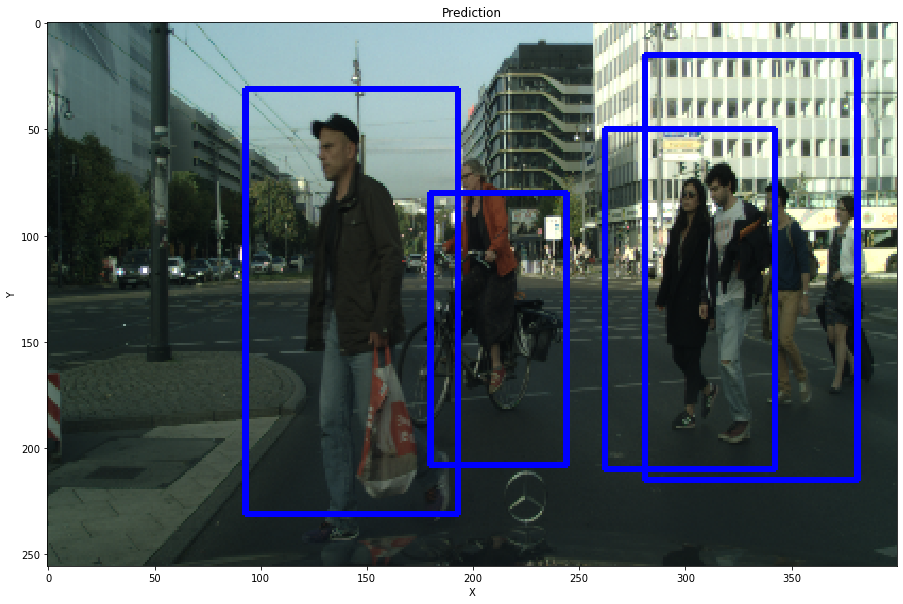

In [12]:
# test_path="./data/rawdata/leftImg8bit/test/berlin"
# file_name="berlin_000122_000019_leftImg8bit.png"
# svm_classifier=PersonDetecor(path_test=test_path,path_anno="",model_path="./data/models/svm_model_28_11_2022_22_54_16.dat")
# svm_classifier.detect_persons_single(file_name=file_name,visualise=True)


Original image size (1024, 2048)


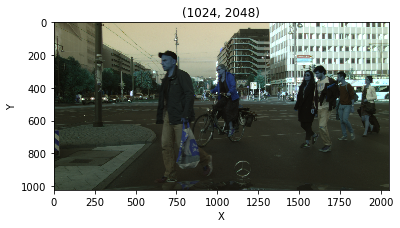

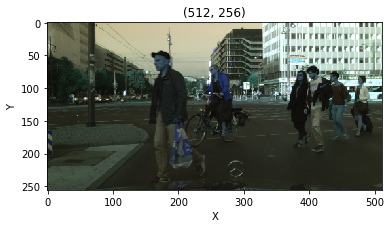

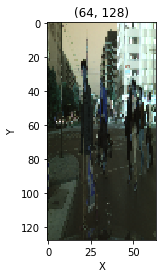

In [16]:
import cv2 
import copy
import matplotlib.pyplot as plt
image_test=cv2.imread("./data/rawdata/leftImg8bit/test/berlin/berlin_000122_000019_leftImg8bit.png")
# image_test=cv2.imread("./data/svm_data/positive/crop_000606c.png")

print(f"Original image size {image_test.shape[0:2]}")
image1=copy.deepcopy(image_test)
image2=copy.deepcopy(image_test)


size1=(512,256)
size2=(64,128)




image1=cv2.resize(image1,size1)
image2=cv2.resize(image2,size2)


figure=plt.figure()
ax=figure.add_subplot(111)
ax.imshow(image_test)
ax.set(title=str(image_test.shape[0:2]),xlabel="X",ylabel="Y")  


figure1=plt.figure()
ax1=figure1.add_subplot(111)
ax1.imshow(image1)
ax1.set(title=str(size1),xlabel="X",ylabel="Y")     


figure2=plt.figure()
ax2=figure2.add_subplot(111)
ax2.imshow(image2)
ax2.set(title=str(size2),xlabel="X",ylabel="Y")  
plt.show()




